In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16

In [11]:
train_datagen = ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.25)

train_generator = train_datagen.flow_from_directory(
    r"C:\Users\786me\Desktop\FinalYearProject\ASDScanPath\ASD\Images",
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    r"C:\Users\786me\Desktop\FinalYearProject\ASDScanPath\ASD\Images", # same directory as training data
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation') # set as validation data

Found 411 images belonging to 2 classes.
Found 136 images belonging to 2 classes.


In [12]:
# Load the pre-trained VGG16 model, excluding the top layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [13]:
# Add a new top layer for binary classification
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
predictions = tf.keras.layers.Dense(1, activation='sigmoid')(x)

# Create the new model
model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [14]:
history = model.fit(train_generator, validation_data=validation_generator, epochs = 2)

Epoch 1/2
13/13 [==============================] - 142s 11s/step - loss: 0.9964 - accuracy: 0.5061 - val_loss: 0.6726 - val_accuracy: 0.6029
Epoch 2/2
13/13 [==============================] - 138s 11s/step - loss: 0.7190 - accuracy: 0.5450 - val_loss: 0.6810 - val_accuracy: 0.6029


In [18]:
##Confusion Matrix Generator and ROC Curve
y_pred_real = model.predict(validation_generator)

5/5 [==============================] - 10s 2s/step


[[82  0]
 [54  0]]


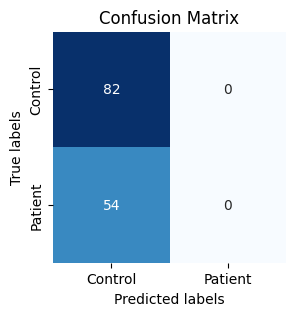

NameError: name 'roc_curve' is not defined

In [19]:
y_pred = [int(p >= 0.5) for p in y_pred_real] ##With sigmoid 1 neuron
##y_pred = np.argmax(Y_pred, axis=1) ##With softmax and 2 neurons 

y_true = validation_generator.classes
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(validation_generator.classes, y_pred)
print(cm)
# Define the class labels
class_names = validation_generator.class_indices.keys()
import seaborn as sns
# Plot the confusion matrix as an image
fig, ax = plt.subplots(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_names, yticklabels=class_names, ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.show()

# Calculate the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_true, y_pred_real)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()